In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from tqdm import tqdm
from joblib import parallel_backend
from Bio import SeqIO
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import permutations
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display= 'diagram')
#from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
#from src.KMerTransformers import *

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [19]:
import pandas as pd

# URLs of the CSV files
Table1 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
Table2 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(Table1)
df2 = pd.read_csv(Table2)

In [20]:
# Renaming the columns for clarity
df1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
df2.columns = ['Original_Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(df1, df2, left_on='Code', right_on='Original_Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(11)


Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Original_Code,Sequence
0,Cri1N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri1N-2,TCCGCGAA-GTTTCGGA
1,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri2S-2,TCCTGAGC-CGTACGTA
2,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri3N-1,ACCCAGCA-CGTACGTA
3,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-2,CGAGGCTG-GAGTGGAT
4,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-3,ACCCAGCA-GAGTGGAT
5,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5N-2,ATGTCAGA-GAGTGGAT
6,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-1,TAAGGCGA-ATTCCTTT
7,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-2,TCCTGAGC-ATTCCTTT
8,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-1,AGGGTCAA-ATTCCTTT
9,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-3,ACAGTGGT-TAAGACAC


In [21]:
import pandas as pd

# Load the CSV files from the provided URLs
table_1_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
table_2_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

table_1 = pd.read_csv(table_1_path, header=1)
table_2 = pd.read_csv(table_2_path)

# Renaming the columns for clarity
table_1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
table_2.columns = ['Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(table_1, table_2, on='Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(10)


Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Sequence
0,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-CGTACGTA
1,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-CGTACGTA
2,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,CGAGGCTG-GAGTGGAT
3,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-GAGTGGAT
4,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ATGTCAGA-GAGTGGAT
5,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TAAGGCGA-ATTCCTTT
6,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-ATTCCTTT
7,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,AGGGTCAA-ATTCCTTT
8,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACAGTGGT-TAAGACAC
9,Cri7N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TATCGTCG-ATTCCTTT


In [22]:

# Drop the specified columns from the DataFrame
species_compare_df = merged_table.drop(['Code', 'Position', 'Tree_age'], axis=1)

# Display the DataFrame after dropping the columns
print("\nMerged Table after dropping columns:")
species_compare_df.head(10)


Merged Table after dropping columns:


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,China,TCCTGAGC-CGTACGTA
1,19.53,110.76,China,ACCCAGCA-CGTACGTA
2,19.53,110.76,China,CGAGGCTG-GAGTGGAT
3,19.53,110.76,China,ACCCAGCA-GAGTGGAT
4,19.53,110.76,China,ATGTCAGA-GAGTGGAT
5,19.53,110.76,China,TAAGGCGA-ATTCCTTT
6,19.53,110.76,China,TCCTGAGC-ATTCCTTT
7,19.53,110.76,China,AGGGTCAA-ATTCCTTT
8,19.53,110.76,China,ACAGTGGT-TAAGACAC
9,19.53,110.76,China,TATCGTCG-ATTCCTTT


In [23]:
# Define a dictionary that maps the country names to numbers
country_to_number = {'China': 1, 'Malaysia': 2, 'Costa Rica': 3, 'Africa': 4}

# Replace the country names with numbers in the 'origin' column
species_compare_df['Origin'] = species_compare_df['Origin'].replace(country_to_number)

# Display the DataFrame after replacing the country names
print("\nMerged Table after replacing country names with numbers:")
print(species_compare_df.head(25))


Merged Table after replacing country names with numbers:
    Latitute  Longitude  Origin           Sequence
0      19.53     110.76       1  TCCTGAGC-CGTACGTA
1      19.53     110.76       1  ACCCAGCA-CGTACGTA
2      19.53     110.76       1  CGAGGCTG-GAGTGGAT
3      19.53     110.76       1  ACCCAGCA-GAGTGGAT
4      19.53     110.76       1  ATGTCAGA-GAGTGGAT
5      19.53     110.76       1  TAAGGCGA-ATTCCTTT
6      19.53     110.76       1  TCCTGAGC-ATTCCTTT
7      19.53     110.76       1  AGGGTCAA-ATTCCTTT
8      19.53     110.76       1  ACAGTGGT-TAAGACAC
9      19.53     110.76       1  TATCGTCG-ATTCCTTT
10     19.53     110.76       1  GCTACGCT-ATAGAGGC
11     19.53     110.76       1  ACCCAGCA-ATAGAGGC
12     19.53     110.76       1  AGGGTCAA-ATAGAGGC
13     19.53     110.76       1  CTTCGTTC-ATAGAGGC
14     19.53     110.76       1  CTGAAGCT-CCTATCCT
15     19.53     110.76       1  TAGGCATG-AGCTGAAC
16     19.53     110.76       1  CGAGGCTG-GGCTCTGA
17     19.53     110.76 

In [24]:
# Remove hyphens from the 'Sequence' column
species_compare_df['Sequence'] = species_compare_df['Sequence'].str.replace('-', '')

# Display the DataFrame after removing hyphens
print("\nMerged Table after removing hyphens from 'Sequence':")
species_compare_df.head(10)


Merged Table after removing hyphens from 'Sequence':


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,1,TCCTGAGCCGTACGTA
1,19.53,110.76,1,ACCCAGCACGTACGTA
2,19.53,110.76,1,CGAGGCTGGAGTGGAT
3,19.53,110.76,1,ACCCAGCAGAGTGGAT
4,19.53,110.76,1,ATGTCAGAGAGTGGAT
5,19.53,110.76,1,TAAGGCGAATTCCTTT
6,19.53,110.76,1,TCCTGAGCATTCCTTT
7,19.53,110.76,1,AGGGTCAAATTCCTTT
8,19.53,110.76,1,ACAGTGGTTAAGACAC
9,19.53,110.76,1,TATCGTCGATTCCTTT


In [25]:
# Select only the 'Origin' and 'Sequence' columns
species_compare_df = species_compare_df[['Origin', 'Sequence']]

# Display the DataFrame after selecting the columns
print("\nMerged Table with only 'origin' and 'Sequence':")
species_compare_df.head(200)


Merged Table with only 'origin' and 'Sequence':


,Origin,Sequence
0,1,TCCTGAGCCGTACGTA
1,1,ACCCAGCACGTACGTA
2,1,CGAGGCTGGAGTGGAT
3,1,ACCCAGCAGAGTGGAT
4,1,ATGTCAGAGAGTGGAT
...,...,...
170,4,ATGTCAGAGTGGCCTT
171,4,CGGCTATGCAGGACGT
172,4,ACAGTGGTTAGGCATG
173,4,ACCCAGCATAGGCATG


In [26]:
species_compare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Origin    175 non-null    int64 
 1   Sequence  175 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to generate k-mers
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

# Create a CountVectorizer for k-mers
k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Transform the sequences into k-mer counts
X_kmers = vectorizer.fit_transform(species_compare_df['Sequence'])

# Convert to a DataFrame
kmer_matrix = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows
kmer_matrix.head(10)

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,0,0,1,0,2,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,1


In [28]:
kmer_matrix.head()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0


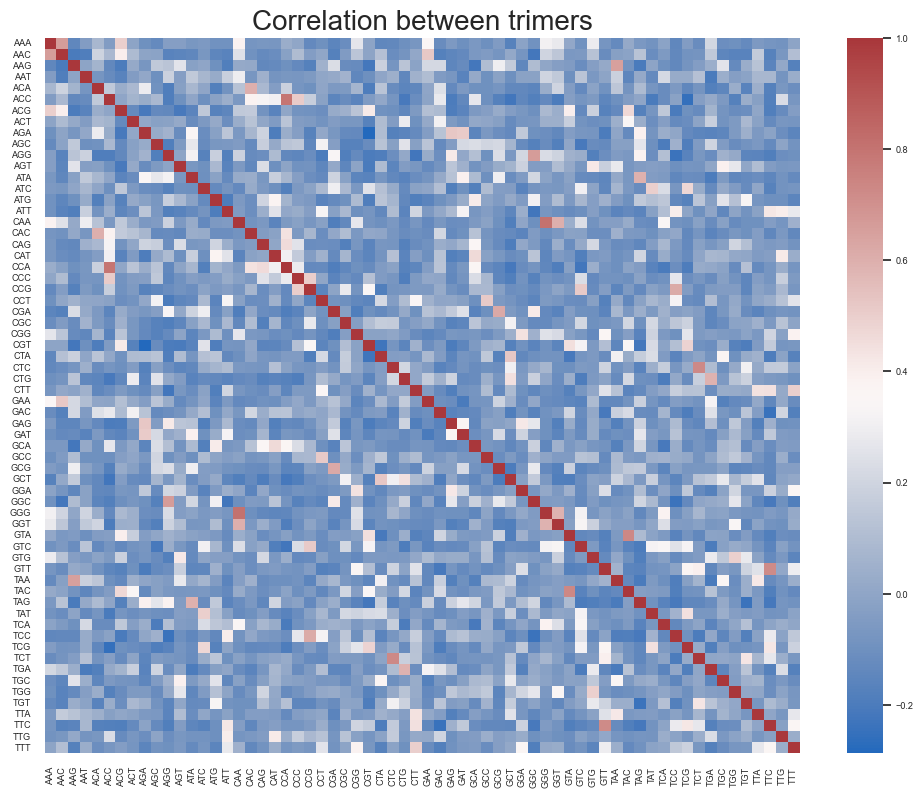

In [29]:
#plot a heatmap of correlation between features
kmer_corr = kmer_matrix.corr()
fig = plt.figure(figsize=(10,8))
plt.title('Correlation between trimers', fontdict={'fontsize': 20})
sns.set(font_scale=.6)
sns.heatmap(kmer_corr, cmap="vlag")
plt.tight_layout()
plt.show()

In [30]:
# Assuming kmer_matrix is already created and includes the 'Origin' column
# If the 'Origin' column is not included in kmer_matrix, add it:
kmer_matrix['Origin'] = species_compare_df['Origin']

# Now group by 'Origin' instead of 'target' and calculate the mean of k-mers
mean_agg_df = kmer_matrix.groupby('Origin', sort=False).agg(['mean'])

# Display the resulting aggregated DataFrame
mean_agg_df


,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Origin,,,,,,,,,,,,,,,,,,,,,
1,0.105263,0.052632,0.157895,0.210526,0.105263,0.157895,0.210526,0.000000,0.473684,0.368421,...,0.263158,0.157895,0.421053,0.000000,0.315789,0.105263,0.052632,0.315789,0.000000,0.210526
2,0.175676,0.418919,0.391892,0.108108,0.378378,0.351351,0.486486,0.067568,0.324324,0.202703,...,0.283784,0.054054,0.283784,0.094595,0.081081,0.108108,0.121622,0.216216,0.067568,0.067568
3,0.136986,0.178082,0.273973,0.082192,0.205479,0.164384,0.232877,0.136986,0.465753,0.232877,...,0.383562,0.191781,0.438356,0.054795,0.109589,0.205479,0.054795,0.657534,0.054795,0.273973
4,0.000000,0.000000,0.222222,0.222222,0.111111,0.222222,0.111111,0.000000,0.111111,0.222222,...,0.000000,0.444444,0.111111,0.222222,0.333333,0.444444,0.111111,0.222222,0.000000,0.000000


In [31]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming mean_agg_df is already defined and is a DataFrame

# Set up the dimension of each subplot and the final graph
rows = 16
cols = 4
fig_cols = 2  # Number of columns in the figure grid (adjusted to fit all subplots)
fig_rows = 3  # Number of rows in the figure grid (adjusted to fit all subplots)

# Get the total max and min for scaling later
mean_agg = mean_agg_df.copy()
mean_max = mean_agg.max().max()
mean_min = mean_agg.min().min()

# Ensure the index is strings if they are not
mean_agg.index = mean_agg.index.astype(str)

# Extract the title for each subplot, and the trimers in each matrix
mean_agg_index = [f'{x.title()} Genome' for x in mean_agg.index]
kmer_index = np.array([x[0] for x in mean_agg.columns.levels[0]]).reshape(rows, cols)  # Adjust to use the correct level

# Scale the data with MinMax
mean_agg = (np.array(mean_agg) - mean_min) / (mean_max - mean_min)

# Plot the graph
fig = make_subplots(rows=fig_rows, cols=fig_cols, subplot_titles=mean_agg_index)
layout = {'title': 'Scaled Mean Values of Each Trimer Grouped by Genome', 'width': 1200, 'height': 900}

subplot_count = 0

for row_index in range(fig_rows):
    for col_index in range(fig_cols):
        if subplot_count >= len(mean_agg):
            break
        array = mean_agg[subplot_count].astype(float).reshape(rows, cols)
        # Draw a heatmap for genome
        fig.add_trace(go.Heatmap(z=array, coloraxis='coloraxis'), row=row_index + 1, col=col_index + 1)
        # Draw each trimer over each square in each subplot
        for k in range(rows):
            for j in range(cols):
                fig.add_annotation(text=np.array(kmer_index).reshape(rows, cols)[k][j],
                                   x=j, y=k, showarrow=False, row=row_index + 1, col=col_index + 1, font=dict(size=9, color="#222299"))
        layout[f'xaxis{subplot_count + 1 if subplot_count > 0 else ""}'] = dict(visible=False)
        layout[f'yaxis{subplot_count + 1 if subplot_count > 0 else ""}'] = dict(autorange='reversed', visible=False)
        subplot_count += 1

fig.update_layout(layout)
fig.update_coloraxes(colorscale='bupu')
fig.show()


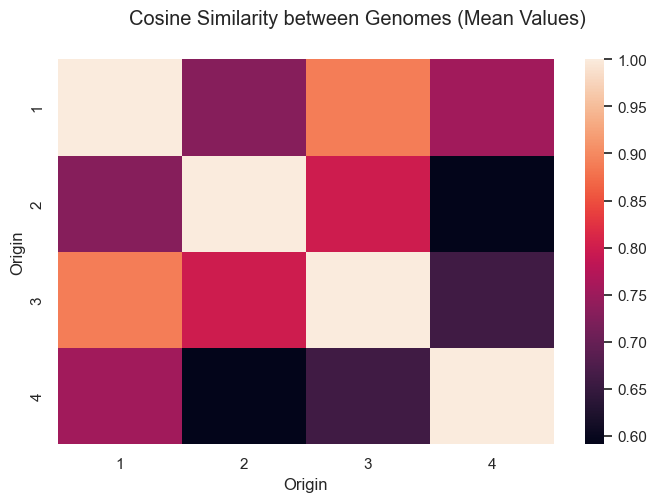

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similiarity_map = pd.DataFrame(cosine_similarity(np.array(mean_agg_df),np.array(mean_agg_df)), index=mean_agg_df.index, columns=mean_agg_df.index)
fig = plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.heatmap(cosine_similiarity_map)
plt.suptitle('Cosine Similarity between Genomes (Mean Values)')
plt.show()

In [33]:
# Ensure the 'Origin' column is in the kmer_matrix if it's not already included
kmer_matrix['Origin'] = species_compare_df['Origin']

# Group by 'Origin' instead of 'target' and calculate the standard deviation of k-mers
var_agg_df = kmer_matrix.groupby('Origin', sort=False).agg(['std'])

# Display the resulting aggregated DataFrame
var_agg_df

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
Origin,,,,,,,,,,,,,,,,,,,,,
1,0.315302,0.229416,0.374634,0.418854,0.458831,0.374634,0.535303,0.000000,0.611775,0.495595,...,0.653376,0.374634,0.606977,0.000000,0.582393,0.315302,0.229416,0.582393,0.000000,0.418854
2,0.417366,0.573544,0.518627,0.312636,0.566235,0.480651,0.762894,0.252716,0.499537,0.437293,...,0.630726,0.227668,0.453911,0.294652,0.274823,0.312636,0.368362,0.503964,0.252716,0.302097
3,0.346212,0.419738,0.533861,0.276557,0.439662,0.373188,0.457060,0.346212,0.688843,0.486500,...,0.679668,0.592957,0.600609,0.229154,0.314539,0.439662,0.229154,0.749429,0.229154,0.449082
4,0.000000,0.000000,0.440959,0.440959,0.333333,0.440959,0.333333,0.000000,0.333333,0.440959,...,0.000000,0.881917,0.333333,0.440959,0.500000,0.527046,0.333333,0.440959,0.000000,0.000000


In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming var_agg_df is already defined and is a DataFrame

# Set up the dimension of each subplot and the final graph
rows = 16
cols = 4
fig_cols = 2  # Number of columns in the figure grid (adjusted to fit all subplots)
fig_rows = 3  # Number of rows in the figure grid (adjusted to fit all subplots)

# Extract the title for each subplot, and the trimers in each matrix
var_agg = var_agg_df.copy()

# Ensure the index is strings if they are not
var_agg.index = var_agg.index.astype(str)

# Extract the title for each subplot, and the trimers in each matrix
var_agg_index = [f'{x.title()} Genome' for x in var_agg.index]
kmer_index = np.array([x[0] for x in var_agg.columns.levels[0]]).reshape(rows, cols)

# Convert the data to numpy array
var_agg = np.array(var_agg)

# Plot the graph
fig = make_subplots(rows=fig_rows, cols=fig_cols, subplot_titles=var_agg_index)
layout = {'title': 'Variance of Each Trimer Column Grouped by Genome', 'width': 1200, 'height': 900}

subplot_count = 0

for row_index in range(fig_rows):
    for col_index in range(fig_cols):
        if subplot_count >= len(var_agg):
            break
        array = var_agg[subplot_count].astype(float).reshape(rows, cols)
        # Draw a heatmap for genome
        fig.add_trace(go.Heatmap(z=array, coloraxis='coloraxis'), row=row_index + 1, col=col_index + 1)
        # Draw each trimer over each square in each subplot
        for k in range(rows):
            for j in range(cols):
                fig.add_annotation(text=np.array(kmer_index).reshape(rows, cols)[k][j],
                                   x=j, y=k, showarrow=False, row=row_index + 1, col=col_index + 1, font=dict(size=9, color="#222299"))
        layout[f'xaxis{subplot_count + 1 if subplot_count > 0 else ""}'] = dict(visible=False)
        layout[f'yaxis{subplot_count + 1 if subplot_count > 0 else ""}'] = dict(autorange='reversed', visible=False)
        subplot_count += 1

fig.update_layout(layout)
fig.update_coloraxes(colorscale='tempo')
fig.show()


# Train Test Split

In [35]:
baseline_df = pd.concat([species_compare_df], axis=0).reset_index(drop=True)

In [36]:

labeler = LabelEncoder()

X = baseline_df.drop(columns='Origin')
y = labeler.fit_transform(baseline_df['Origin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to generate k-mers from sequences
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

# Instantiate CountVectorizer with the custom k-mer generating function as the analyzer
kmer_vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k=3))

# Assuming X_train and X_test are series or lists containing the DNA sequences
X_train_trans = kmer_vectorizer.fit_transform(X_train).toarray()
X_test_trans = kmer_vectorizer.transform(X_test).toarray()


# Baseline Model for Binary Classification

In [38]:

baseline_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)
baseline_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))],
         verbose=True)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
              precision    recall  f1-score   support

           1       0.50      0.20      0.29         5
           2       0.85      0.73      0.79        15
           3       0.62      0.71      0.67        14
           4       0.25      1.00      0.40         1

    accuracy                           0.66        35
   macro avg       0.56      0.66      0.53        35
weighted avg       0.69      0.66      0.66        35



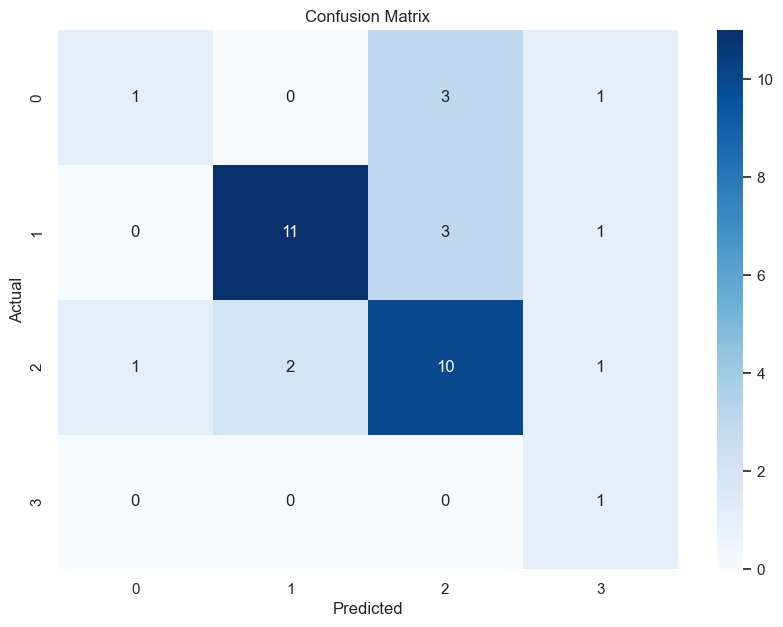

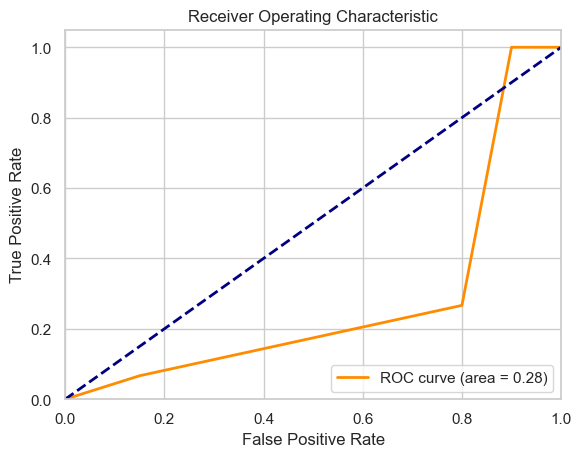

In [40]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assume species_compare_df is already defined as in previous steps
# Example: species_compare_df = pd.read_csv('your_data.csv')

# Transform the DNA sequences into k-mer counts
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Extract features from the sequences
X_kmers = vectorizer.fit_transform(species_compare_df['Sequence'])

# Convert to DataFrame and include Origin column
kmer_matrix = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())
kmer_matrix['Origin'] = species_compare_df['Origin']

# Prepare the data for modeling
X = kmer_matrix.drop(columns='Origin')
y = species_compare_df['Origin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Define the baseline model pipeline
baseline_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)

# Fit the baseline model
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_preds = baseline_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_preds))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_preds, pos_label=baseline_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
              precision    recall  f1-score   support

           1       0.50      0.20      0.29         5
           2       0.85      0.73      0.79        15
           3       0.62      0.71      0.67        14
           4       0.25      1.00      0.40         1

    accuracy                           0.66        35
   macro avg       0.56      0.66      0.53        35
weighted avg       0.69      0.66      0.66        35



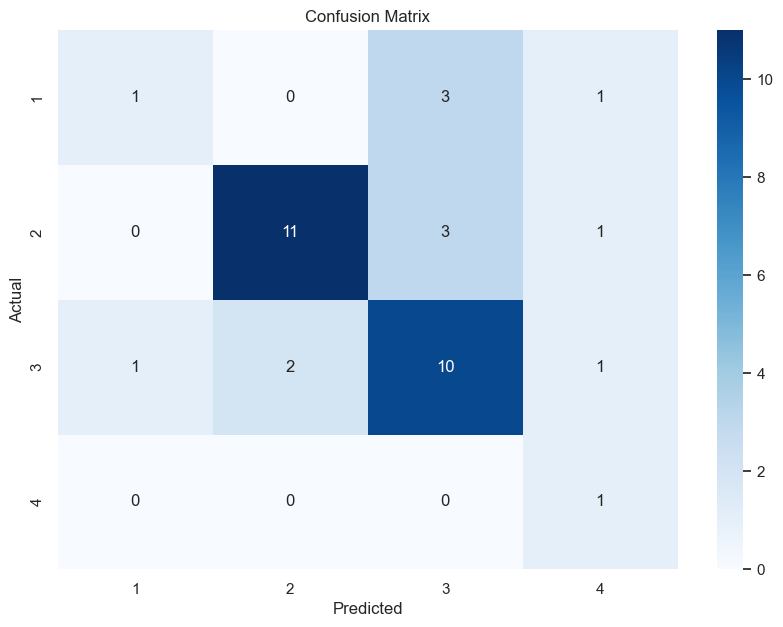

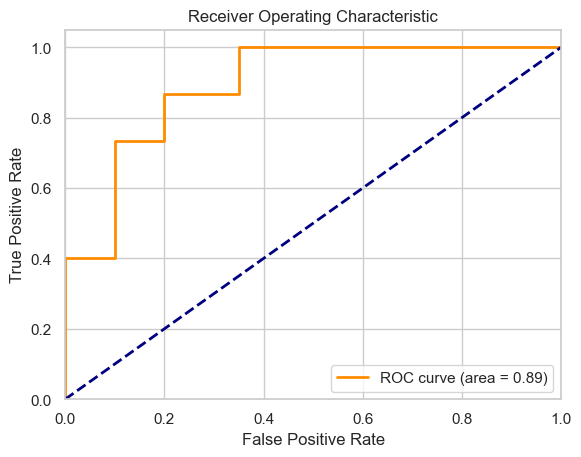

In [41]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Transform the DNA sequences into k-mer counts
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Extract features from the sequences
X_kmers = vectorizer.fit_transform(species_compare_df['Sequence'])

# Convert to DataFrame and include Origin column
kmer_matrix = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())
kmer_matrix['Origin'] = species_compare_df['Origin']

# Prepare the data for modeling
X = kmer_matrix.drop(columns='Origin')
y = species_compare_df['Origin']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, test_size=0.2)

# Define the baseline model pipeline
baseline_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)

# Fit the baseline model
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_preds = baseline_model.predict(X_test)

# Print the classification report
target_names = [str(class_label) for class_label in label_encoder.classes_]
print(classification_report(y_test, y_preds, target_names=target_names))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1], pos_label=label_encoder.transform(label_encoder.classes_)[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [42]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming species_compare_df is already defined
# Transform the DNA sequences into k-mer counts
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Extract features from the sequences
X_kmers = vectorizer.fit_transform(species_compare_df['Sequence'])
X = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())
y = species_compare_df['Origin']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, test_size=0.2)

# Define a dictionary of models and their hyperparameters
models = [
    ('LogisticRegression', LogisticRegression(random_state=42), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    }),
    ('RandomForest', RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
        'classifier__max_depth': [4, 6, 8, 10],
        'classifier__criterion': ['gini', 'entropy']
    }),
    ('SVC', SVC(probability=True, random_state=42), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    })
]



In [43]:
# Perform grid search to find the best model and hyperparameters
best_model = None
best_score = 0
best_params = None
for model_name, model, params in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")



Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features='log2', n_estimators=50,
                                        random_state=42))])
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'log2', 'classifier__n_estimators': 50}


              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.74      0.93      0.82        15
           3       0.60      0.64      0.62        14
           4       0.00      0.00      0.00         1

    accuracy                           0.69        35
   macro avg       0.58      0.44      0.44        35
weighted avg       0.70      0.69      0.65        35



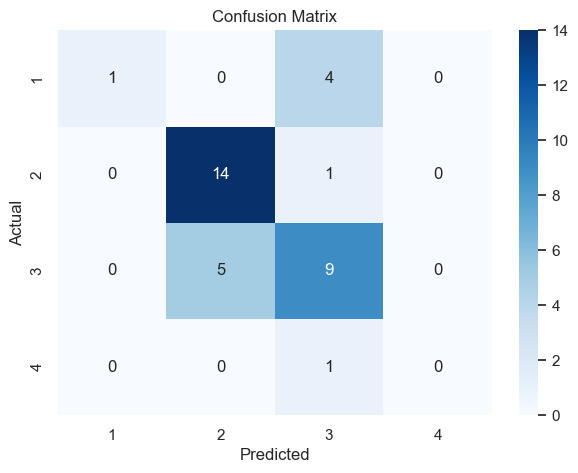

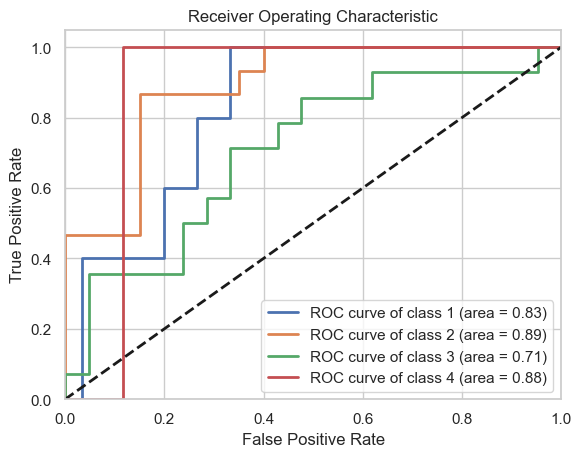

In [44]:

# Predict on the test set with the best model
y_preds = best_model.predict(X_test)

# Print the classification report
target_names = [str(class_label) for class_label in label_encoder.classes_]
print(classification_report(y_test, y_preds, target_names=target_names))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute and plot ROC curve for each class
plt.figure()
for i in range(len(target_names)):
    fpr, tpr, _ = roc_curve(y_test == i, best_model.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {target_names[i]} (area = {auc(fpr, tpr):0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
pip install scikit-optimize lightgbm catboost xgboost


Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 46
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -0.864105
[LightGBM] [Info] Start training from score -0.864105
[LightGBM] [Info] Start training from score -2.862201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

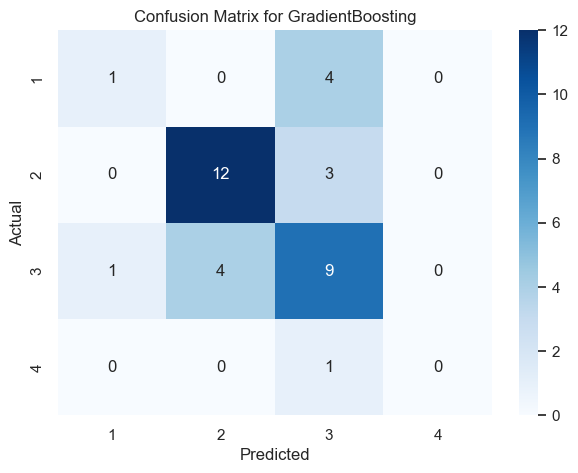

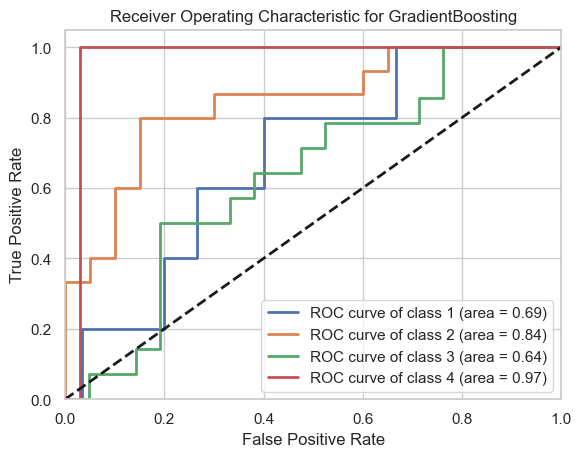

Model: XGBoost
Best CV Score: 0.6714285714285715
Best Parameters: OrderedDict([('classifier__learning_rate', 0.01), ('classifier__max_depth', 3), ('classifier__n_estimators', 147)])
Test Accuracy: 0.7428571428571429
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.80      0.80      0.80        15
           3       0.69      0.79      0.73        14
           4       1.00      1.00      1.00         1

    accuracy                           0.74        35
   macro avg       0.79      0.75      0.76        35
weighted avg       0.74      0.74      0.74        35



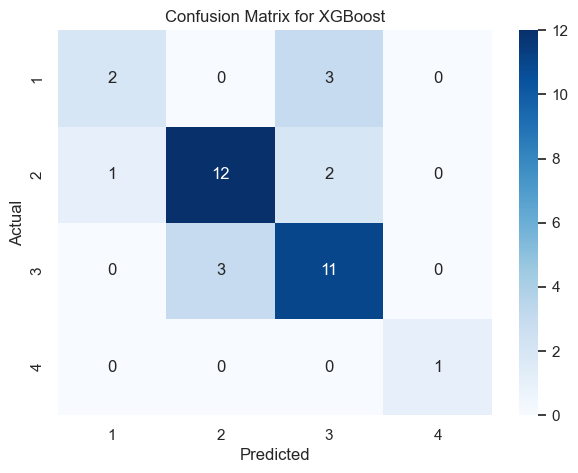

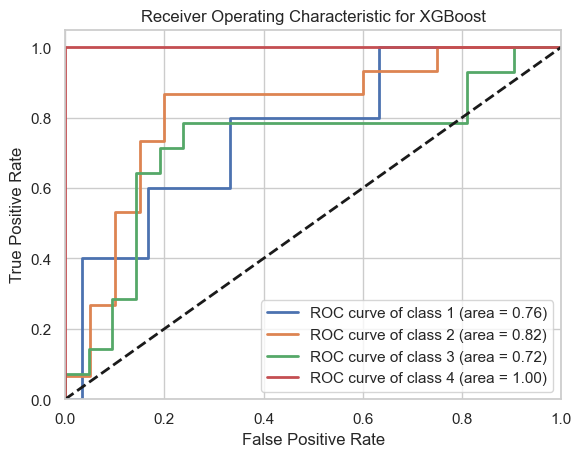

Model: LightGBM
Best CV Score: 0.6642857142857143
Best Parameters: OrderedDict([('classifier__learning_rate', 0.03912695469996465), ('classifier__max_depth', 5), ('classifier__n_estimators', 72)])
Test Accuracy: 0.6571428571428571
              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.75      0.80      0.77        15
           3       0.56      0.71      0.63        14
           4       0.00      0.00      0.00         1

    accuracy                           0.66        35
   macro avg       0.58      0.43      0.43        35
weighted avg       0.69      0.66      0.63        35



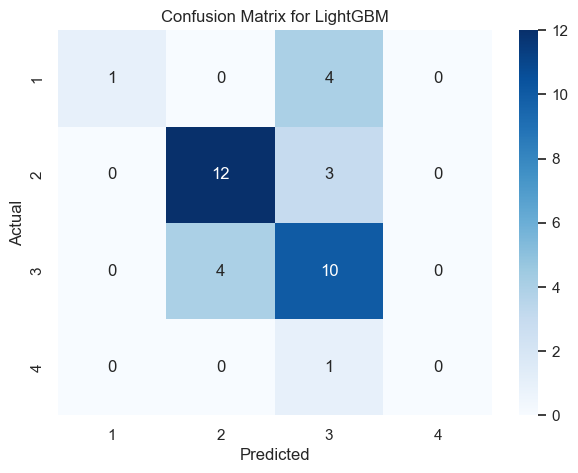

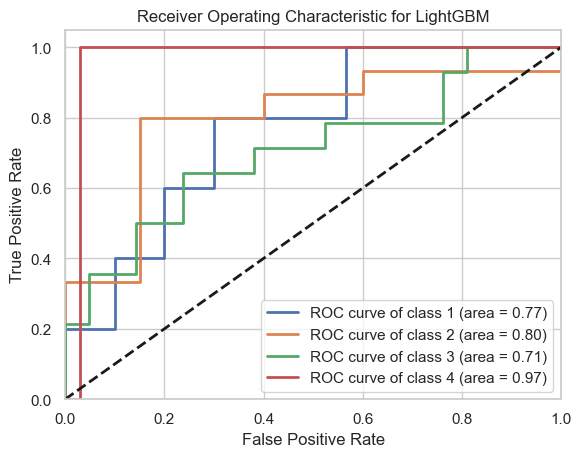

Model: CatBoost
Best CV Score: 0.6857142857142858
Best Parameters: OrderedDict([('classifier__depth', 3), ('classifier__iterations', 76), ('classifier__learning_rate', 0.18513862219322413)])
Test Accuracy: 0.41306122448979593
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.81      0.87      0.84        15
           3       0.58      0.79      0.67        14
           4       0.00      0.00      0.00         1

    accuracy                           0.69        35
   macro avg       0.35      0.41      0.38        35
weighted avg       0.58      0.69      0.63        35



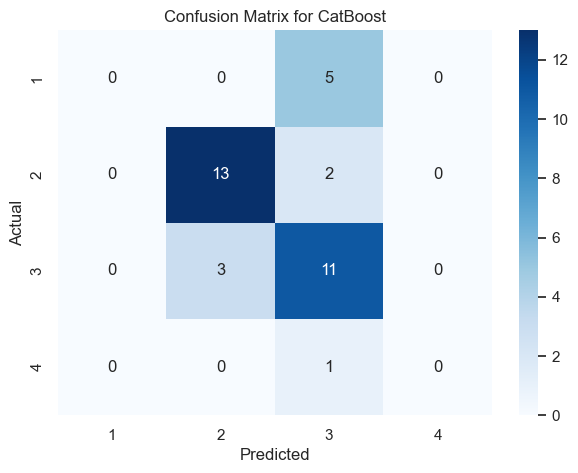

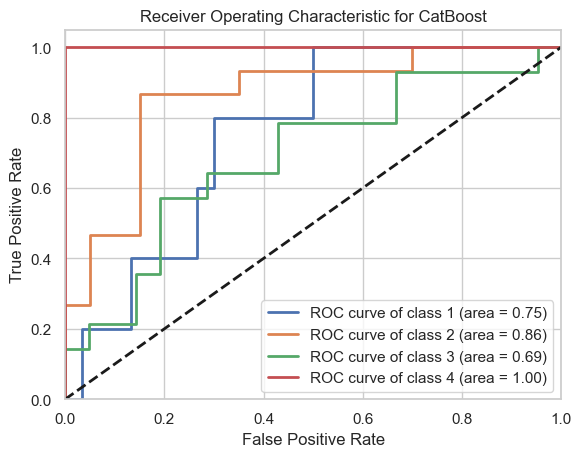

Model: AdaBoost
Best CV Score: 0.5642857142857143
Best Parameters: OrderedDict([('classifier__learning_rate', 0.010708668965641129), ('classifier__n_estimators', 91)])
Test Accuracy: 0.6285714285714286
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.67      0.93      0.78        15
           3       0.57      0.57      0.57        14
           4       0.00      0.00      0.00         1

    accuracy                           0.63        35
   macro avg       0.31      0.38      0.34        35
weighted avg       0.51      0.63      0.56        35



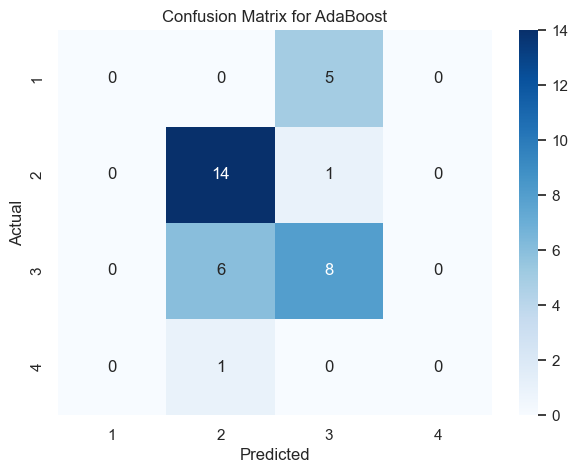

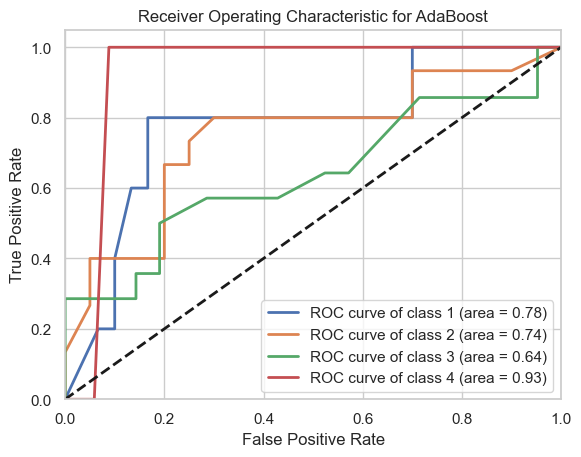

In [46]:


# Assuming species_compare_df is already defined
# Transform the DNA sequences into k-mer counts
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Extract features from the sequences
X_kmers = vectorizer.fit_transform(species_compare_df['Sequence'])
X = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())
y = species_compare_df['Origin']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, test_size=0.2)

# Define a dictionary of models and their hyperparameters using Bayesian Optimization
models = [
    ('GradientBoosting', GradientBoostingClassifier(random_state=42), {
        'classifier__n_estimators': Integer(50, 200),
        'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'classifier__max_depth': Integer(3, 7)
    }),
    ('XGBoost', XGBClassifier(random_state=42), {
        'classifier__n_estimators': Integer(50, 200),
        'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'classifier__max_depth': Integer(3, 7)
    }),
    ('LightGBM', LGBMClassifier(random_state=42), {
        'classifier__n_estimators': Integer(50, 200),
        'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'classifier__max_depth': Integer(3, 7)
    }),
    ('CatBoost', CatBoostClassifier(random_state=42, silent=True), {
        'classifier__iterations': Integer(50, 200),
        'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
        'classifier__depth': Integer(3, 7)
    }),
    ('AdaBoost', AdaBoostClassifier(random_state=42), {
        'classifier__n_estimators': Integer(50, 200),
        'classifier__learning_rate': Real(0.01, 0.2, prior='log-uniform')
    })
]

# Perform Bayesian Optimization to find the best model and hyperparameters
results = []
for model_name, model, params in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    bayes_search = BayesSearchCV(pipeline, search_spaces=params, n_iter=32, cv=5, n_jobs=-1, random_state=42)
    bayes_search.fit(X_train, y_train)
    
    y_preds = bayes_search.best_estimator_.predict(X_test)
    accuracy = np.mean(y_preds == y_test)
    
    results.append((model_name, bayes_search.best_score_, bayes_search.best_estimator_, bayes_search.best_params_, accuracy))

# Display results
for model_name, cv_score, best_model, best_params, test_accuracy in results:
    print(f"Model: {model_name}")
    print(f"Best CV Score: {cv_score}")
    print(f"Best Parameters: {best_params}")
    print(f"Test Accuracy: {test_accuracy}")
    print(classification_report(y_test, best_model.predict(X_test), target_names=[str(class_label) for class_label in label_encoder.classes_]))
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, best_model.predict(X_test))
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(class_label) for class_label in label_encoder.classes_], yticklabels=[str(class_label) for class_label in label_encoder.classes_])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    # Compute and plot ROC curve for each class
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test == i, best_model.predict_proba(X_test)[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {auc(fpr, tpr):0.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
